# DATASET 2 – Bank And Customer Churn

# 1. Data Understanding & Problem Framing

In [ ]:
Datasource: Kaggle
Real-world context:In the competitive banking industry, customer retention is critical because losing customers leads to revenue loss and increased acquisition costs.
Predicting churn allows banks to take proactive steps to retain high-risk customers through targeted interventions.

In [3]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('C:/Users/sneha/Downloads/Churn_Modelling.csv')

In [9]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
df.shape

(10000, 14)

In [17]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
The dataset contains 10000 rows and 14 columns.
The target variable is Exited (It represents the outcome we want to predict.
All other features are potential predictors influencing this outcome)

In [ ]:
Numerical features:CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary
Categorical:Gender, Geography
Binary: HasCrCard, IsActiveMember, Exited (Target)

# 2. DATA PREPROCESSING

In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [ ]:
No missing and duplicate values

In [ ]:
No further preprocessing is done

# 3. Exploratory Data Analysis & Visualization

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

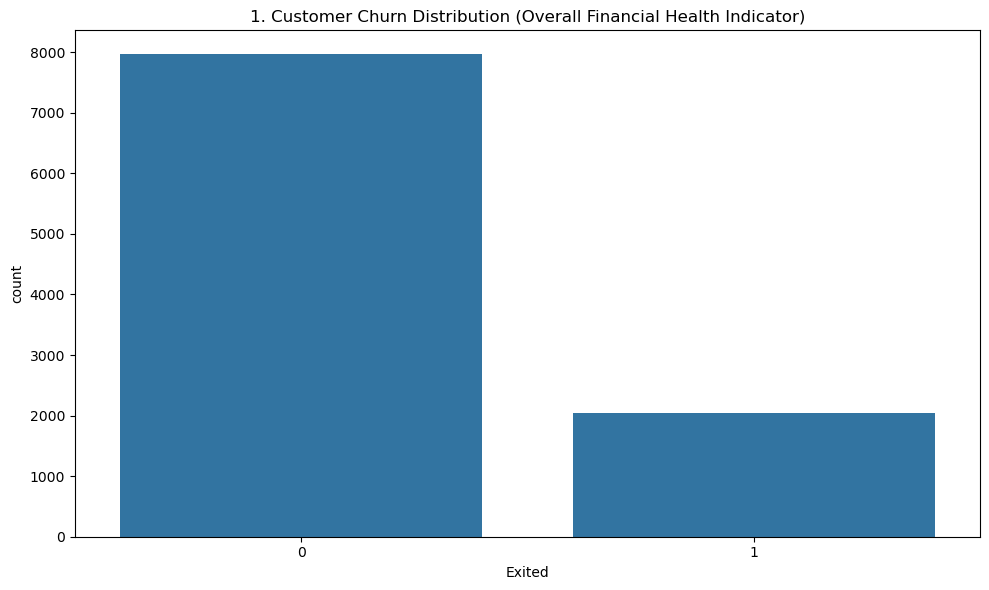

In [33]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Exited")
plt.title(f'{plot_no}. Customer Churn Distribution (Overall Financial Health Indicator)')
show_fig()
plot_no += 1

In [ ]:
Class imbalance exist
Shows that approximately 20% of customers churned while 80% were retained, indicating moderate class imbalance.

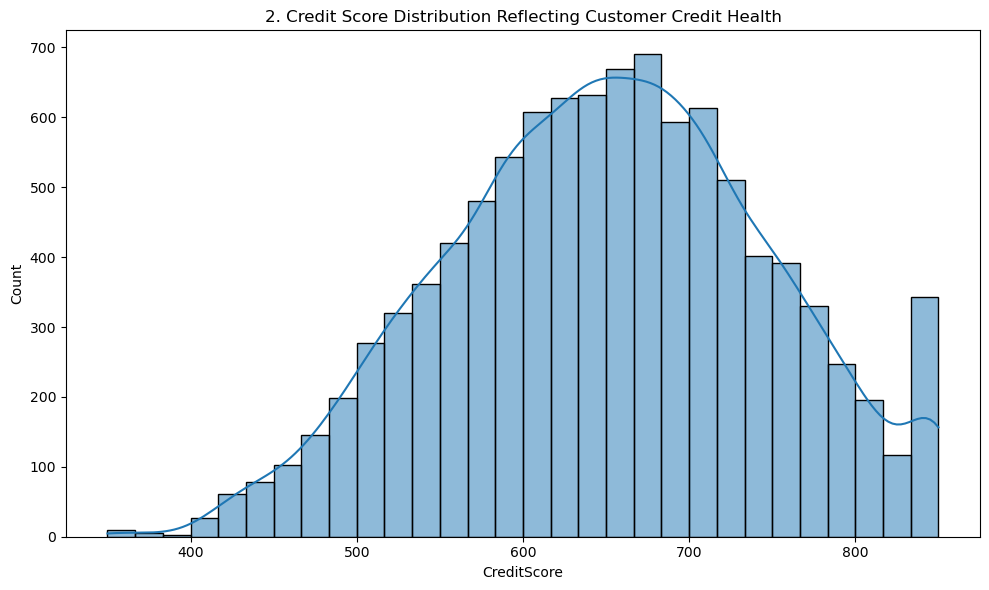

In [35]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["CreditScore"], bins=30, kde=True)
plt.title(f'{plot_no}. Credit Score Distribution Reflecting Customer Credit Health')
show_fig()
plot_no += 1

In [ ]:
Illustrates that customer credit scores are approximately normally distributed around the mid-range.

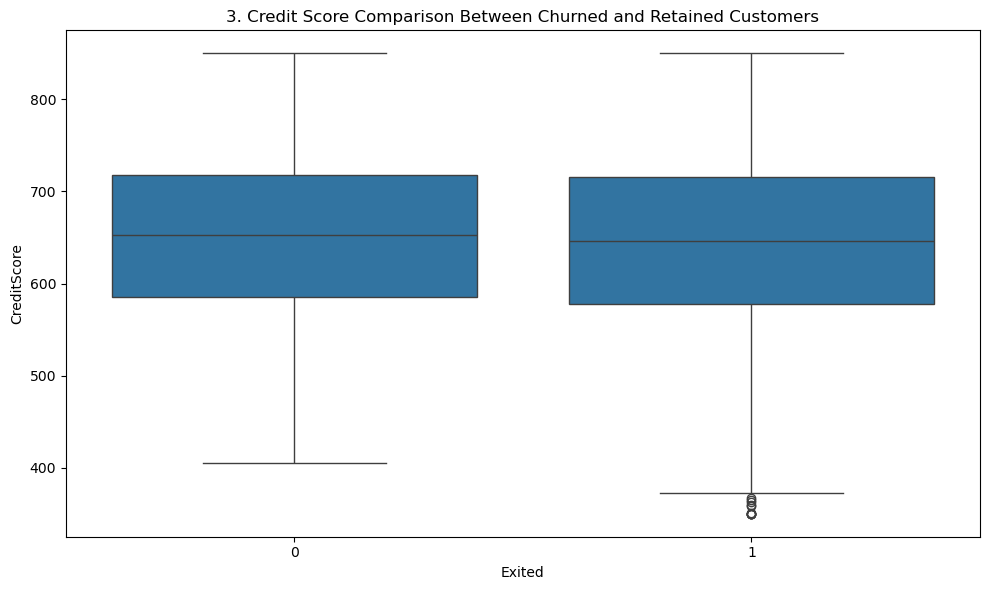

In [37]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Exited", y="CreditScore")
plt.title(f'{plot_no}. Credit Score Comparison Between Churned and Retained Customers')
show_fig()
plot_no += 1

In [ ]:
Compares credit score distributions between churned and retained customers, showing substantial overlap.

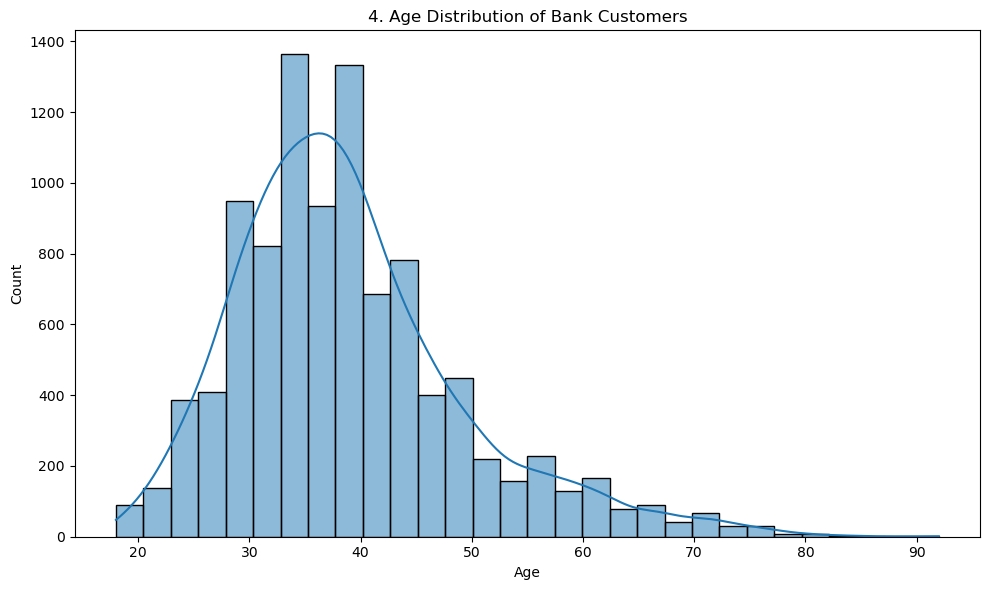

In [39]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title(f'{plot_no}. Age Distribution of Bank Customers')
show_fig()
plot_no += 1

In [ ]:
Displays that most customers fall within the 30–45 age range.

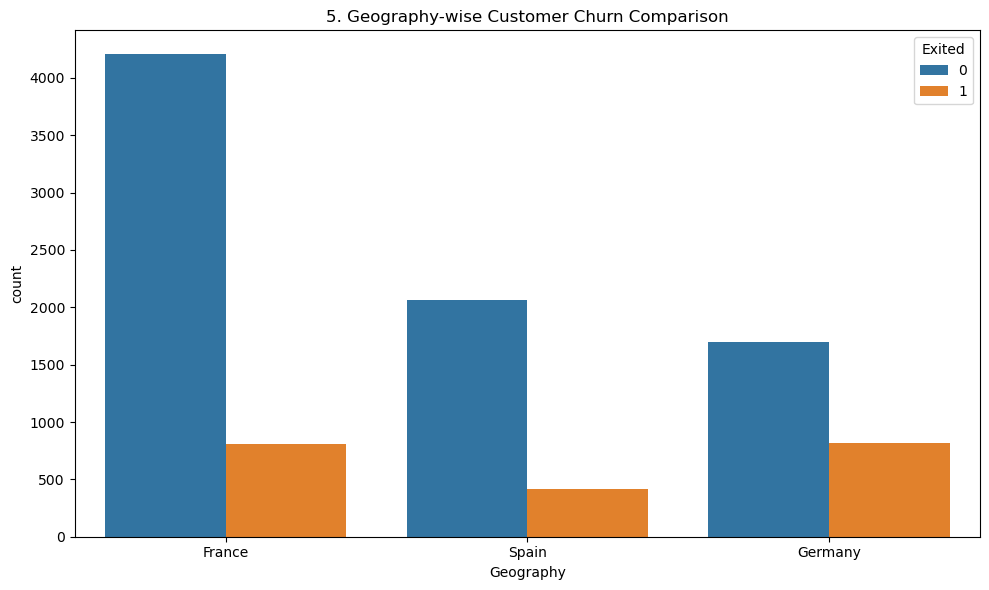

In [41]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title(f'{plot_no}. Geography-wise Customer Churn Comparison')
show_fig()
plot_no += 1

In [ ]:
Shows that churn rates vary by region, with Germany exhibiting relatively higher churn.

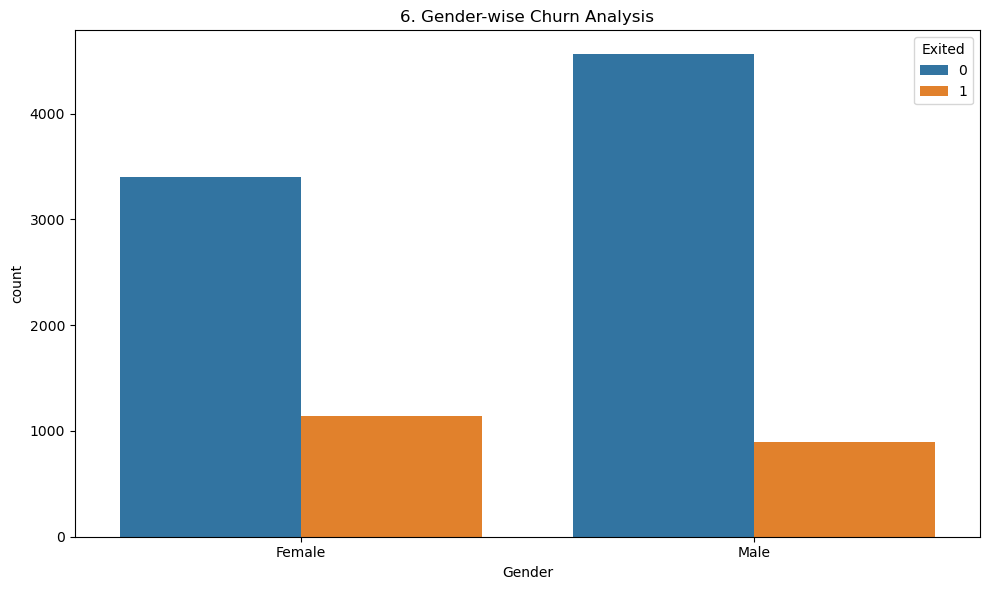

In [43]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Gender", hue="Exited")
plt.title(f'{plot_no}. Gender-wise Churn Analysis')
show_fig()
plot_no += 1

In [ ]:
Indicates that female customers have a slightly higher churn rate compared to male customers.

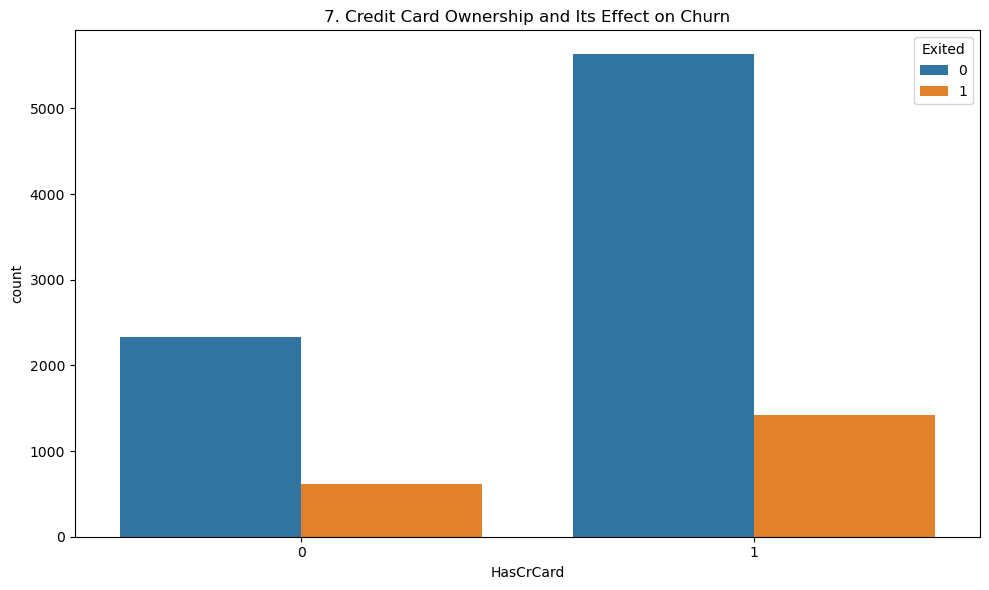

In [45]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="HasCrCard", hue="Exited")
plt.title(f'{plot_no}. Credit Card Ownership and Its Effect on Churn')
show_fig()
plot_no += 1

In [ ]:
Demonstrates that credit card ownership does not strongly differentiate churn behavior.

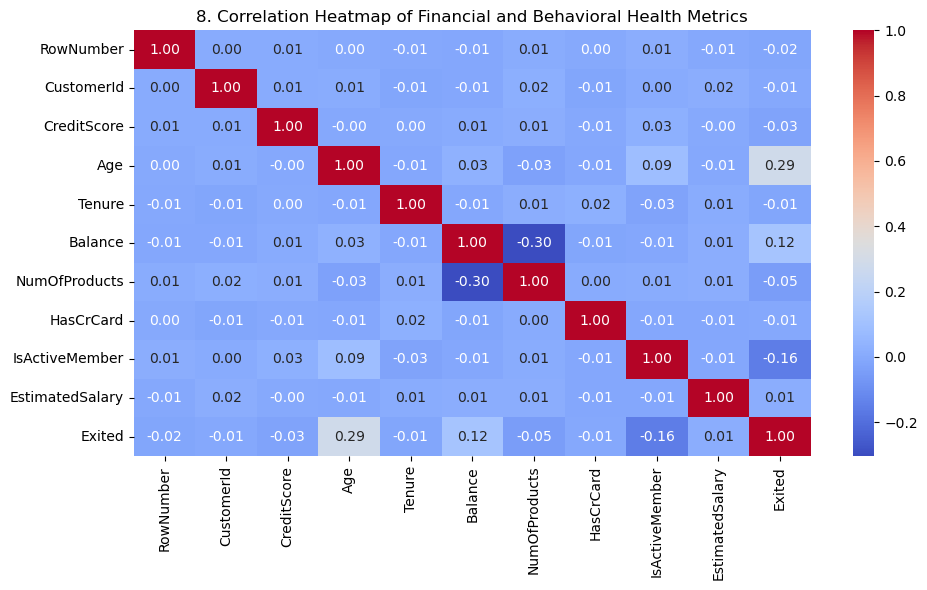

In [47]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title(f'{plot_no}. Correlation Heatmap of Financial and Behavioral Health Metrics')
show_fig()
plot_no += 1

In [ ]:
Highlights relationships between numerical features and churn, with Age positively and Active Membership negatively correlated with exit.

# 4. Insights, Observations & Modeling Readiness

In [ ]:
Approximately 20% of customers have churned, indicating a meaningful but moderate class imbalance that requires attention during modeling.
Customer age is positively correlated with churn, suggesting that older customers are more likely to exit the bank.
Credit score distribution overlaps heavily between churned and retained customers, indicating it is not a strong standalone predictor of churn.

Customers in Germany exhibit higher churn rates compared to France and Spain, highlighting potential regional service or competitive differences.

Female customers show slightly higher churn rates than male customers, suggesting gender-based behavioral differences.

Customers with higher account balances show a moderate positive relationship with churn, indicating high-value customers may also be at risk.

Being an active member is negatively correlated with churn, suggesting customer engagement significantly reduces exit probability.

Credit card ownership does not strongly differentiate churn behavior, indicating limited predictive value.

Most numerical features do not show severe multicollinearity, making the dataset suitable for both linear and tree-based models.

Non-informative identifiers such as CustomerId and RowNumber must be removed as they do not contribute predictive value.

Feature distributions for several variables overlap significantly between classes, suggesting nonlinear models may perform better than simple linear approaches.

The dataset contains strong behavioral and demographic signals that can support effective churn prediction when modeled appropriately.